In [ ]:
!pip install yfinance
!pip install mplfinance
import mplfinance as mpf
import yfinance as yf
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 567.0 kB/s eta 0:00:00


布林通道預測股價

In [ ]:
# 設定起始日期
start_date = '2023-01-01'
end=dt.datetime.today()

In [ ]:
# 下載 S&P 500 股價資料
stock_id='^GSPC'
data = yf.download(stock_id, start="2023-01-01", end=end)
#data['days_return']=data['Close'].pct_change()
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,3853.290039,3878.459961,3794.330078,3824.139893,3824.139893,3959140000
2023-01-04,3840.360107,3873.159912,3815.770020,3852.969971,3852.969971,4414080000
2023-01-05,3839.739990,3839.739990,3802.419922,3808.100098,3808.100098,3893450000
2023-01-06,3823.370117,3906.189941,3809.560059,3895.080078,3895.080078,3923560000
2023-01-09,3910.820068,3950.570068,3890.419922,3892.090088,3892.090088,4311770000
...,...,...,...,...,...,...
2024-04-04,5244.049805,5256.589844,5146.060059,5147.209961,5147.209961,4075680000
2024-04-05,5158.950195,5222.180176,5157.209961,5204.339844,5204.339844,3386780000
2024-04-08,5211.370117,5219.569824,5197.350098,5202.390137,5202.390137,3278180000


In [ ]:

def sma(df):
  df['8MA'] = df['Close'].rolling(window=8).mean()
  df['13MA'] = df['Close'].rolling(window=13).mean()
  return df

In [ ]:
def macd(df):
  df['12EMA'] = df['Close'].ewm(span=12, adjust=False).mean()
  df['26EMA'] = df['Close'].ewm(span=26, adjust=False).mean()
  df['MACD'] = df['12EMA'] - df['26EMA']
  df['Signal line'] = df['MACD'].ewm(span=9, adjust=False).mean()
  df['MACD_Histogram'] = df['MACD'] - df['Signal line']
  return df

In [ ]:
def rsi(df):
  delta = df['Close'].diff()
  gain = delta.where(delta > 0, 0)
  loss = -delta.where(delta < 0, 0)
  avg_gain = gain.rolling(window=14, min_periods=1).mean()
  avg_loss = loss.rolling(window=14, min_periods=1).mean()
  rs = avg_gain / avg_loss
  df['RSI'] = 100 - (100 / (1 + rs))
  return df

In [ ]:
def Boolean(df):
    df['Upper_Band'] = df['Close'] + 1.5 * df['Close'].rolling(window=20).std()
    df['Lower_Band'] = df['Close'] - 1.5 * df['Close'].rolling(window=20).std()
    return df

In [ ]:
new_data=sma(data)
new_data=macd(data)
new_data=rsi(data)
new_data=Boolean(data)
new_data

,Open,High,Low,Close,Adj Close,Volume,8MA,13MA,12EMA,26EMA,MACD,Signal line,MACD_Histogram,RSI,Upper_Band,Lower_Band
Date,,,,,,,,,,,,,,,,
2023-01-03,3853.290039,3878.459961,3794.330078,3824.139893,3824.139893,3959140000,NaN,NaN,3824.139893,3824.139893,0.000000,0.000000,0.000000,NaN,NaN,NaN
2023-01-04,3840.360107,3873.159912,3815.770020,3852.969971,3852.969971,4414080000,NaN,NaN,3828.575289,3826.275454,2.299835,0.459967,1.839868,100.000000,NaN,NaN
2023-01-05,3839.739990,3839.739990,3802.419922,3808.100098,3808.100098,3893450000,NaN,NaN,3825.425260,3824.929131,0.496129,0.467199,0.028929,39.118178,NaN,NaN
2023-01-06,3823.370117,3906.189941,3809.560059,3895.080078,3895.080078,3923560000,NaN,NaN,3836.141386,3830.125498,6.015888,1.576937,4.438951,72.074999,NaN,NaN
2023-01-09,3910.820068,3950.570068,3890.419922,3892.090088,3892.090088,4311770000,NaN,NaN,3844.748878,3834.715467,10.033411,3.268232,6.765179,70.758303,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-04,5244.049805,5256.589844,5146.060059,5147.209961,5147.209961,4075680000,5216.611328,5212.396184,5199.753869,5159.665882,40.087988,51.781610,-11.693622,49.552114,5215.921646,5078.498276
2024-04-05,5158.950195,5222.180176,5157.209961,5204.339844,5204.339844,3386780000,5214.880066,5216.620793,5200.459404,5162.975064,37.484340,48.922156,-11.437816,61.220709,5272.340260,5136.339428
2024-04-08,5211.370117,5219.569824,5197.350098,5202.390137,5202.390137,3278180000,5214.731323,5218.457745,5200.756440,5165.894699,34.861741,46.110073,-11.248332,57.389619,5266.191635,5138.588638


In [ ]:

new_data['days_return']=new_data['Close'].pct_change()
new_data.dropna(inplace=True)
new_data.tail()

,Open,High,Low,Close,Adj Close,Volume,8MA,13MA,12EMA,26EMA,MACD,Signal line,MACD_Histogram,RSI,Upper_Band,Lower_Band,days_return
Date,,,,,,,,,,,,,,,,,
2024-04-04,5244.049805,5256.589844,5146.060059,5147.209961,5147.209961,4075680000,5216.611328,5212.396184,5199.753869,5159.665882,40.087988,51.781610,-11.693622,49.552114,5215.921646,5078.498276,-0.012334
2024-04-05,5158.950195,5222.180176,5157.209961,5204.339844,5204.339844,3386780000,5214.880066,5216.620793,5200.459404,5162.975064,37.484340,48.922156,-11.437816,61.220709,5272.340260,5136.339428,0.011099
2024-04-08,5211.370117,5219.569824,5197.350098,5202.390137,5202.390137,3278180000,5214.731323,5218.457745,5200.756440,5165.894699,34.861741,46.110073,-11.248332,57.389619,5266.191635,5138.588638,-0.000375
2024-04-09,5217.029785,5224.810059,5160.779785,5209.910156,5209.910156,3400680000,5209.908813,5217.326209,5202.164704,5169.155103,33.009600,43.489978,-10.480378,54.661027,5267.791305,5152.029007,0.001445
2024-04-10,5167.879883,5178.430176,5138.700195,5160.640137,5160.640137,3845930000,5198.195068,5211.103929,5195.776309,5168.524365,27.251944,40.242371,-12.990428,40.591166,5219.441149,5101.839124,-0.009457


In [ ]:
split_data_x=new_data[['Upper_Band','Lower_Band']][:len(new_data['Close'])-1]
split_data_x

,Upper_Band,Lower_Band
Date,,
2023-01-31,4196.142090,3957.058105
2023-02-01,4239.811720,3998.608202
2023-02-02,4310.458928,4049.060603
2023-02-03,4258.669745,4014.290216
2023-02-06,4231.054126,3991.106031
...,...,...
2024-04-03,5284.553857,5138.426612
2024-04-04,5215.921646,5078.498276
2024-04-05,5272.340260,5136.339428


In [ ]:
split_data_y=new_data['Close'][1:]

split_data_y

Date
2023-02-01    4119.209961
2023-02-02    4179.759766
2023-02-03    4136.479980
2023-02-06    4111.080078
2023-02-07    4164.000000
                 ...     
2024-04-04    5147.209961
2024-04-05    5204.339844
2024-04-08    5202.390137
2024-04-09    5209.910156
2024-04-10    5160.640137
Name: Close, Length: 299, dtype: float64

In [ ]:
index=round(len(split_data_y)*0.65)
train_x=split_data_x[:index]
test_x=split_data_x[index:]
train_y=split_data_y[:index]
test_y=split_data_y[index:]
train_x.shape

(194, 2)

In [ ]:
test_x

,Upper_Band,Lower_Band
Date,,
2023-11-07,4509.563227,4247.196539
2023-11-08,4514.501795,4251.057776
2023-11-09,4478.927590,4215.772605
2023-11-10,4553.870215,4276.610253
2023-11-13,4553.696415,4269.403195
...,...,...
2024-04-03,5284.553857,5138.426612
2024-04-04,5215.921646,5078.498276
2024-04-05,5272.340260,5136.339428


使用Lasso Regression模型預測(可以跳過，不要執行)



In [ ]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=0.1)

In [ ]:
lasso_reg.fit(train_x,train_y)

Lasso(alpha=0.1)

In [ ]:
#訓練數據train的r^2(準確率)
import sklearn.metrics as mts
y_train_pred = lasso_reg.predict(train_x)
print("train_score:",mts.r2_score(train_y, y_train_pred))
#測試數據test的r^2(準確率)

y_test_pred = lasso_reg.predict(test_x)
print("test_score:",mts.r2_score(test_y, y_test_pred))

train_score: 0.9566898487070584
test_score: 0.9439121065585415


使用LinearRegression模型預測股價

In [ ]:
model=LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [ ]:
#訓練數據train的r^2(準確率)
import sklearn.metrics as mts
y_train_pred = model.predict(train_x)
print("train_score:",mts.r2_score(train_y, y_train_pred))
#測試數據test的r^2(準確率)

y_test_pred = model.predict(test_x)
print("test_score:",mts.r2_score(test_y, y_test_pred))

train_score: 0.9656247462258665
test_score: 0.9784324570075292


In [ ]:
new_data = new_data.reset_index() # 重設 index
new_data['Date'] = pd.to_datetime(new_data['Date']) # 將 Date 轉換為 datetime 類別

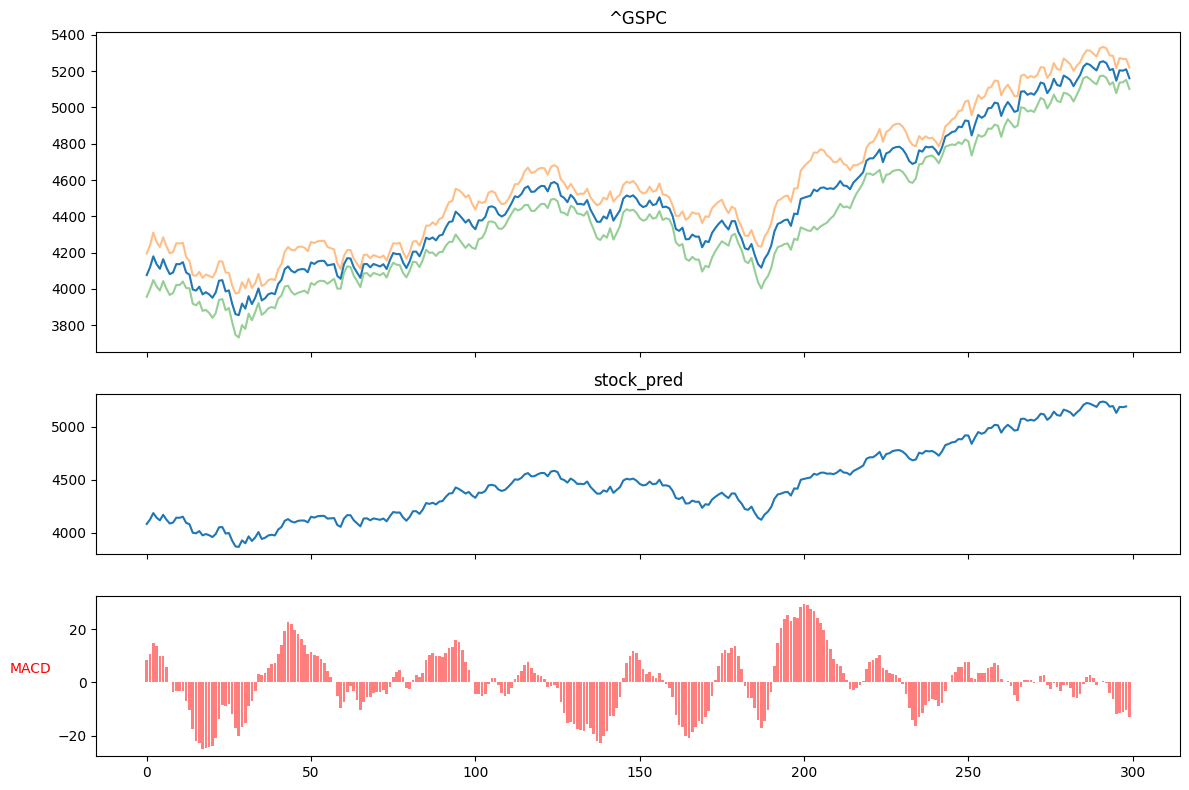

In [ ]:

# 創建三個子圖
fig, (ax1, ax2, ax3) = plt.subplots(3, 1,
                    figsize=(12, 8),
                    gridspec_kw={'height_ratios': [2, 1, 1]},
                    sharex=True)

# 設定 x 軸時間
num = 10
date = new_data["Date"].dt.strftime('%Y-%m-%d')
ax1.plot(new_data['Close'])
# 加入布林通道
ax1.plot(new_data['Upper_Band'], alpha=0.5) # alpha 設定透明度
ax1.plot(new_data['Lower_Band'], alpha=0.5)
ax1.set_title(f'{stock_id}')
ax2.plot(model.predict(split_data_x))
ax2.set_title("stock_pred")
# 繪製技術指標
ax3.bar(new_data.index, new_data['MACD_Histogram'], alpha=0.5, color='red')
ax3.set_ylabel('MACD', color='red', rotation=0, ha='right')

# 調整子圖間的距離
plt.tight_layout()

In [ ]:
new=new_data[['Upper_Band','Lower_Band']][len(new_data['Close'])-1:len(new_data['Close'])]
new

,Upper_Band,Lower_Band
299,5219.441149,5101.839124


In [ ]:
type(new)

pandas.core.frame.DataFrame

In [ ]:
# 创建未来日期索引
future_dates = pd.date_range(start=dt.datetime.today(), periods=10, freq='B')
stock_pred=new_data[['Date','Close','Upper_Band','Lower_Band']][len(new_data['Close'])-20:]
future_stock=pd.DataFrame({'Date':future_dates,'Close':0,'Upper_Band':0,'Lower_Band':0})
stock_pred=pd.concat([stock_pred, future_stock], ignore_index=True)
stock_pred

,Date,Close,Upper_Band,Lower_Band
0,2024-03-13 00:00:00.000000,5165.310059,5254.664632,5075.955485
1,2024-03-14 00:00:00.000000,5150.479980,5237.441681,5063.518280
2,2024-03-15 00:00:00.000000,5117.089844,5201.644008,5032.535680
3,2024-03-18 00:00:00.000000,5149.419922,5229.493020,5069.346823
4,2024-03-19 00:00:00.000000,5178.509766,5248.726782,5108.292750
5,2024-03-20 00:00:00.000000,5224.620117,5288.058187,5161.182047
6,2024-03-21 00:00:00.000000,5241.529785,5314.461968,5168.597602
7,2024-03-22 00:00:00.000000,5234.180176,5312.813489,5155.546862
8,2024-03-25 00:00:00.000000,5218.189941,5296.848864,5139.531019
9,2024-03-26 00:00:00.000000,5203.580078,5280.382658,5126.777498


In [ ]:
for i in range(len(future_dates)):
  pre=stock_pred[['Upper_Band','Lower_Band']][19+i:20+i]
  stock_pred['Close'][20+i]=model.predict(pre)
  stock_pred=Boolean(stock_pred)
stock_pred['days_return']=stock_pred['Close'].pct_change()
stock_pred

<ipython-input-21-0ff58786cd9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_pred['Close'][20+i]=model.predict(pre)
<ipython-input-21-0ff58786cd9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_pred['Close'][20+i]=model.predict(pre)
<ipython-input-21-0ff58786cd9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_pred['Close'][20+i]=model.predict(pre)
<ipython-input-21-0ff58786cd9d>:3: SettingWithCopyWarning: 
A

,Date,Close,Upper_Band,Lower_Band,days_return
0,2024-03-13 00:00:00.000000,5165.310059,NaN,NaN,NaN
1,2024-03-14 00:00:00.000000,5150.479980,NaN,NaN,-0.002871
2,2024-03-15 00:00:00.000000,5117.089844,NaN,NaN,-0.006483
3,2024-03-18 00:00:00.000000,5149.419922,NaN,NaN,0.006318
4,2024-03-19 00:00:00.000000,5178.509766,NaN,NaN,0.005649
5,2024-03-20 00:00:00.000000,5224.620117,NaN,NaN,0.008904
6,2024-03-21 00:00:00.000000,5241.529785,NaN,NaN,0.003237
7,2024-03-22 00:00:00.000000,5234.180176,NaN,NaN,-0.001402
8,2024-03-25 00:00:00.000000,5218.189941,NaN,NaN,-0.003055
9,2024-03-26 00:00:00.000000,5203.580078,NaN,NaN,-0.002800


In [ ]:
# 將填好資料的 DataFrame 寫入 Excel 檔案
stock_pred.to_excel('stock_pred.xlsx', index=False)